# Assignment - 3

In [1]:
from IPython.display import display, Latex # type: ignore
import matplotlib.pyplot as plt

In [2]:
from lib.linalg import power_iteration, QRFactorization
from lib.matrix import Matrix
from lib.array import Array
from lib.optimize import polyfit, get_condition_number, chebyshev
from lib.plotter import plot_poly, plot_chebyshev

### Question 1

In [3]:
A = [[4, 2 / 3, -4 / 3, 4 / 3], [2 / 3, 4, 0, 0], [-4 / 3, 0, 6, 2], [4 / 3, 0, 2, 6]]

A = Matrix.from_list(A)

Part (a)


In [4]:
max_eigval, sol = power_iteration(A)

print(f"Largest eigenvalue of A: {round(max_eigval, 4)}")
print(f"Corresponding eigenvector: {round(sol, 4)}")

Largest eigenvalue of A: 8.0
Corresponding eigenvector: ([0.0005, 0.0002, 0.7068, 0.7074], double)


Part (b)


In [5]:
sol = QRFactorization(A)

eigvals = sol.solve()

print(f"The eigenvalues of A are: {round(eigvals, 4)}")

The eigenvalues of A are: ([8.0, 6.0, 4.0, 2.0], double)


### Question 2

In [6]:
data = [
    #  x	 y
    [0.00, 0.486],
    [0.05, 0.866],
    [0.10, 0.944],
    [0.15, 1.144],
    [0.20, 1.103],
    [0.25, 1.202],
    [0.30, 1.166],
    [0.35, 1.191],
    [0.40, 1.124],
    [0.45, 1.095],
    [0.50, 1.122],
    [0.55, 1.102],
    [0.60, 1.099],
    [0.65, 1.017],
    [0.70, 1.111],
    [0.75, 1.117],
    [0.80, 1.152],
    [0.85, 1.265],
    [0.90, 1.380],
    [0.95, 1.575],
    [1.00, 1.857],
]

data = Matrix.from_list(data)

Using normal Cubic regression

For standard cubic polynomial of type:


<IPython.core.display.Latex object>

Coefficients of the polynomial: 
array('d', [0.57466, 4.72586, -11.12822, 7.66868])
Covariance matrix: 
   0.54404   -3.96041    7.71692   -4.39174
  -3.96041   42.86912  -97.35582   60.14891
   7.71692  -97.35582  238.27685 -154.09626
  -4.39174   60.14891 -154.09626  102.73084
Condition number of the covariance matrix: 
12195.78586908228


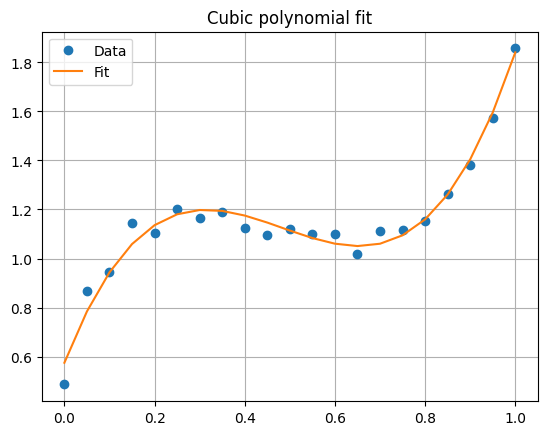

In [7]:
xdata = Array("d", data[:, 0])
ydata = Array("d", data[:, 1])

sol, cov = polyfit(xdata, ydata, 3)

print("For standard cubic polynomial of type:")
display(Latex(r"$f(x) = a_0 + a_1x + a_2x^2 + a_3x^3$"))
print(f"Coefficients of the polynomial: \n{sol}")

print(f"Covariance matrix: \n{cov}")
cond = get_condition_number(cov)
print(f"Condition number of the covariance matrix: \n{cond}")

# Plot the polynomial
plot_poly(xdata, ydata, sol, 3)
plt.title("Cubic polynomial fit")
plt.show()


Using Chebyshev polynomials

For Chebyshev polynomial of type:


<IPython.core.display.Latex object>

Coefficients of the polynomial: 
([1.160969479033552, 0.39351446798815237, 0.04684983209010653, 0.23964617571596986], double)
Covariance matrix: 
   0.05554        0.0    0.02972        0.0
       0.0    0.14346        0.0    0.03692
   0.02972        0.0    0.11144        0.0
       0.0    0.03692        0.0    0.10032
Condition number of the covariance matrix: 
6.404597049865556


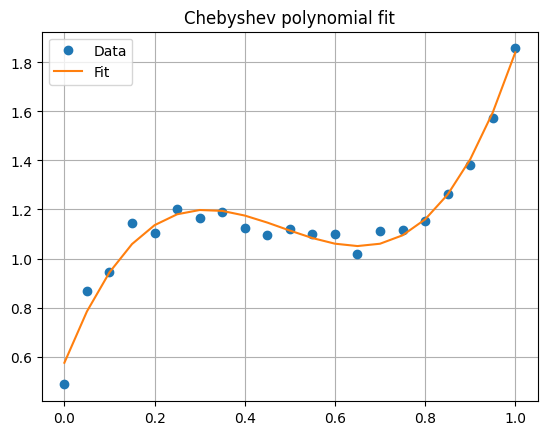

In [8]:
sol, cov = chebyshev(xdata, ydata, 3)

print("For Chebyshev polynomial of type:")
display(Latex(r"$f(x) = a_0 + a_1T_1(x) + a_2T_2(x) + a_3T_3(x)$"))

print(f"Coefficients of the polynomial: \n{sol}")

print(f"Covariance matrix: \n{cov}")
cond = get_condition_number(cov)
print(f"Condition number of the covariance matrix: \n{cond}")

# Plot the polynomial
plt.plot(xdata, ydata, "o", label="Data")
plot_chebyshev(xdata, sol)
plt.title("Chebyshev polynomial fit")
plt.show()


A low condition number for the Chebyshev fit tells us it is less prone or less sensitive in terms of changing the resultant value from the input values. In other terms, the fitting parameters we got from Chebyshev are more mathematical stable than the simple cubic regression.

### Question 3

In [10]:
grades = ["A", "B", "C", "D", "F"]
students = [77, 150, 210, 125, 38]

total_students = sum(students)

# Expected distribution if grades were normally distributed
# Assume "B" and "C" are the average grades
normal_prob = Array(
    "d",
    [0.1359, 0.3413, 0.3413, 0.1359, 0.0214]
)

expected_distribution = normal_prob * total_students

# Chi-square test
chi_square = sum((students - expected_distribution) ** 2 / expected_distribution)

# Degrees of freedom
df = len(grades) - 1

# Critical value for 5% significance level
# critical = 

1.8283333333333334
